In [1]:
import pandas as pd
import pandas_datareader as pdr
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
import requests
import seaborn as sns
import datetime
from pandas.plotting import scatter_matrix
from mpl_finance import candlestick_ohlc
from matplotlib.dates import DateFormatter, date2num, WeekdayLocator, DateLocator, MONDAY
from math import pi
from pprint import pprint
from bokeh.plotting import figure, show, ColumnDataSource
from bokeh.layouts import column
from bokeh.models import BooleanFilter, CDSView, Select, Range1d, HoverTool
from bokeh.palettes import Category10
from bokeh.models.formatters import NumeralTickFormatter
from config import *

C:\Users\nabis\anaconda3\lib\site-packages\mpl_finance.py:22: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  category=DeprecationWarning)


In [2]:
# Initializing lists for storing data
location = []
cases = []
deaths = []

# Querying API for COVID-19 data and appending it to appropriate list
r = requests.get(f'https://finnhub.io/api/v1/covid19/us?token={Api_key}').json()
for i in range(len(r)):
    result=r[i]
    location.append(result['state'])
    cases.append(result['case'])
    deaths.append(result['death'])

In [3]:
# Creating a Pandas DataFrame
d = {'State':location,
    'Cases': cases,
    'Deaths': deaths}

df = pd.DataFrame(d)
df.head()

,State,Cases,Deaths
0,New York,424094,32754
1,New Jersey,183701,15932
2,California,533132,9877
3,Michigan,93893,6478
4,Florida,510413,7748


In [4]:
# Cleaning the DataFrame to show only the 50 US states, removing US territories and others
# Sorting the DataFrame by most cases to least cases
# Resetting the index and dropping original index column
cleaned_df = df.loc[df['State'].isin(state_names)].sort_values('Cases', ascending=False).reset_index().drop(columns='index')
cleaned_df

,State,Cases,Deaths
0,California,533132,9877
1,Florida,510413,7748
2,Texas,474427,7497
3,New York,424094,32754
4,Georgia,201896,3986
5,Illinois,188449,7596
6,New Jersey,183701,15932
7,Arizona,183656,4002
8,North Carolina,131269,2097
9,Louisiana,127246,4146


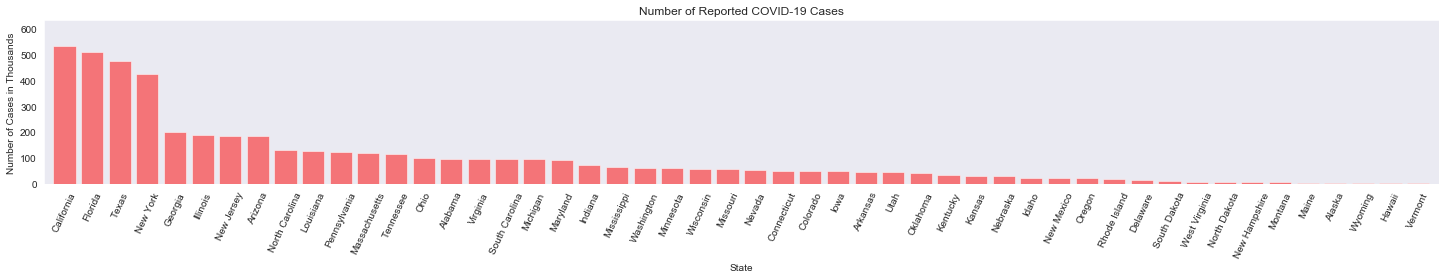

In [5]:
# Bar chart of the cleaned df
# Using Seaborn styling
sns.set_style('dark')

# Our x axis will be the states, while our y axis will be the number of cases for each state in thousands 
plt.figure(figsize=(25,3))
x_axis = cleaned_df['State']
y_axis = cleaned_df['Cases']/1000

plt.bar(x_axis, y_axis, color='r', alpha=0.5, align="center")

# Defining where to place the ticks on the x axis with their rotation
tick_locations = [value for value in x_axis] 
plt.xticks(tick_locations,x_axis,rotation = 65)

# Defining limits of the x and y axis
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(y_axis)+100)

# Adding aesthetics to the chart to clean it up
plt.title("Number of Reported COVID-19 Cases")
plt.xlabel("State")
plt.ylabel("Number of Cases in Thousands")
plt.tight_layout()
plt.show()

C:\Users\nabis\anaconda3\lib\site-packages\ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.


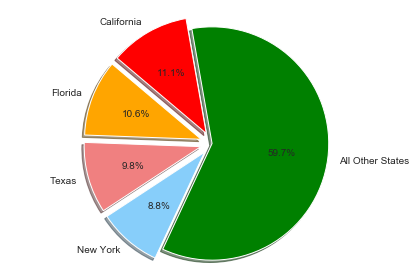

In [93]:
# Plotting the top 5 most cases on a Pie chart
# Creating labels for Pie chart
labels = ['California', 'Florida', 'Texas', 'New York', 'All Other States']

# Defining the values for each category to be plotted
Ca=cleaned_df.loc[cleaned_df['State']=='California',['Cases']].sum()
Fl=cleaned_df.loc[cleaned_df['State']=='Florida',['Cases']].sum()
Tx=cleaned_df.loc[cleaned_df['State']=='Texas',['Cases']].sum()
Ny=cleaned_df.loc[cleaned_df['State']=='New York',['Cases']].sum()
Others=cleaned_df['Cases'].sum()-Ca-Fl-Tx-Ny

# Cleaning it up by combining it in a list
d = [Ca,Fl,Tx,Ny,Others]

# Defining the colors to be used for each category
colors = ['red', 'orange', 'lightcoral', 'lightskyblue', 'green']

# Creating a visual affect by extruding some of the slices
explode = (0.1,0.1,0.1,0.1,0)

# Creating the Pie chart based on the parameters defined above
plt.pie(d, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=100)

# Defining the axis of the pie chart to be equal
plt.axis('equal')

plt.tight_layout()
plt.show()

In [8]:
# Data from Kaggle
# Reading in a CSV file that breaks down the daily COVID-19 cases by county
Daily_count = pd.read_csv("Resources/us_counties_covid19_daily.csv")

# Filtering the data to show only dates since March 1st, 2020. Prior data is negligble.
Daily_count=Daily_count.loc[Daily_count['date']>'2020-03-01']

# Converting the Date column (object) to date
Daily_count['date']=pd.to_datetime(Daily_count['date'])

# Grouping the data by date, as each date had entries for each county in the US
grouped = Daily_count.groupby(['date']).sum()

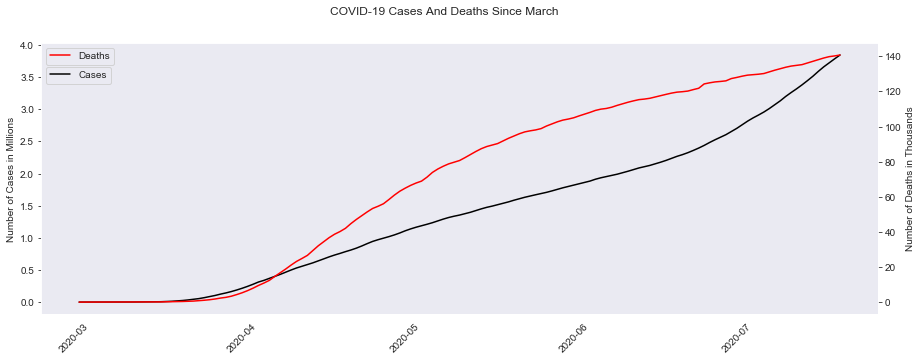

In [10]:
# Plotting a line chart
# Using the date as x axis. There are 2 y axis, cases and deaths.
# On the left, it is cases in millions, on the right it is deaths in thousands
x_axis = grouped.index
y_axis = grouped['cases']/1000000
y_axis2 = grouped['deaths']/1000

# Plotting and chart aesthetics
fig, ax1 = plt.subplots(figsize=(15,5))
fig.suptitle('COVID-19 Cases And Deaths Since March ')

ax1.plot(x_axis,y_axis, color="black",label='Cases')
plt.xticks(rotation=45)
plt.legend(loc='center left',bbox_to_anchor=(0,.88))
ax2 = ax1.twinx()
ax2.plot(x_axis, y_axis2,color='r',label='Deaths')
ax2.tick_params(axis='y')
ax1.set_ylabel("Number of Cases in Millions")
ax2.set_ylabel("Number of Deaths in Thousands")
plt.legend(loc='best')
plt.show()

In [12]:
# Base URL for the API used
base_url = "https://finnhub.io/api/v1"

# Initializing lists for storing data
dow_ticker = []
dow_high = []
dow_high_date = []
dow_low = []
dow_low_date = []

# Looping through each stock in the pre-definied list (config.py)
# Not all the stocks in the list will be found on the API
# Therefore try and except
for stock in dow:
   
    try:
        query_url = f'{base_url}/stock/metric?symbol={stock}&metric=all&token={Api_key}'
        r = requests.get(query_url).json()

        dow_high.append(round(r['metric']['52WeekHigh'],2))
        dow_high_date.append(r['metric']['52WeekHighDate'])
        dow_low.append(round(r['metric']['52WeekLow'],2))
        dow_low_date.append(r['metric']['52WeekLowDate'])
        dow_ticker.append(r['symbol'])
    
    except:
        pass

# Creating a Pandas DataFrame
dow_d = {
    "Dow Ticker Symbol" : dow_ticker,
    "Dow 52 Week High" : dow_high,
    "Dow 52 Week High Date" : dow_high_date,
    "Dow 52 Week Low" : dow_low,
    "Dow 52 Week Low Date" : dow_low_date
}

dow_df = pd.DataFrame(dow_d)

# Converting dates (obj) to date
dow_df['Dow 52 Week High Date'] = pd.to_datetime(dow_df['Dow 52 Week High Date'])
dow_df['Dow 52 Week Low Date'] = pd.to_datetime(dow_df['Dow 52 Week Low Date'])

# Sorting dates for easier plotting
high_sort = dow_df.sort_values(by='Dow 52 Week High Date')
high_dates = high_sort['Dow 52 Week High Date']
low_sort = dow_df.sort_values(by='Dow 52 Week Low Date')
low_dates = low_sort['Dow 52 Week Low Date']

In [ ]:
# sns.set_style('darkgrid')
# plt.figure(figsize=(10,10))

# without=dow_df.loc[(dow_df['Dow Ticker Symbol'] != 'MSFT') & (dow_df['Dow Ticker Symbol'] != 'AAPL')]
# MSFT_APPL=dow_df.loc[(dow_df['Dow Ticker Symbol'] == 'MSFT') | (dow_df['Dow Ticker Symbol'] == 'AAPL')]

# x_values = without['Dow 52 Week High Date']
# x_values2 = without['Dow 52 Week Low Date']
# x_values3 = MSFT_APPL['Dow 52 Week High Date']
# x_values4 = dow_df.sort_values(by=['Dow 52 Week Low Date'])
# y_values = without['Dow Ticker Symbol']
# y_values2 = MSFT_APPL['Dow Ticker Symbol']

# plt.scatter(x_values,y_values, label= 'High', color='green')
# plt.scatter(x_values2,y_values, label='Low', color='red')
# plt.scatter(x_values3,y_values2, color='green')

# plt.title('Dow 52 Week Highs and Lows')
# plt.xlabel('Date')
# plt.ylabel('Dow Ticker')
# plt.xticks(rotation=45)

# plt.legend(loc='best')

# plt.tight_layout()
# plt.show()

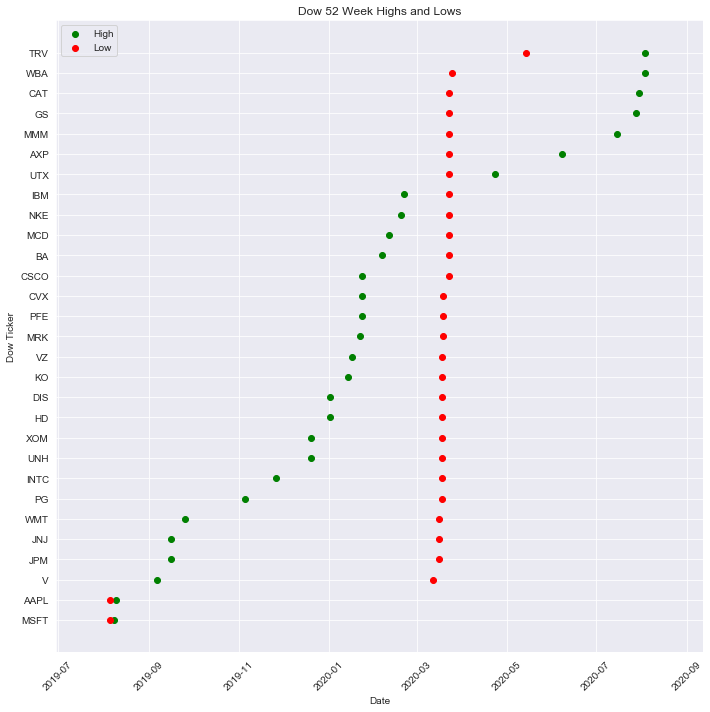

In [29]:
# Scatter plot for the 52 week highs and lows for the stocks
plt.figure(figsize=(10,10))

x_values = high_dates
x_values2 = low_dates
y_values = dow_df['Dow Ticker Symbol']

plt.scatter(x_values,y_values, label= 'High', color='green')
plt.scatter(x_values2,y_values, label='Low', color='red')

plt.title('Dow 52 Week Highs and Lows')
plt.xlabel('Date')
plt.ylabel('Dow Ticker')
plt.xticks(rotation=45)

plt.legend(loc='best')

plt.tight_layout()
plt.show()

In [13]:
# Using Yahoo finance to pull historical data on each of the 3 indices
# January 1, 2020 YTD
start = datetime.datetime(2020,1,1)
end = datetime.datetime(2020,8,6)
DJI = web.DataReader('^DJI', 'yahoo', start, end)
NDX = web.DataReader('^IXIC', 'yahoo', start, end)
SPX = web.DataReader('^GSPC', 'yahoo', start, end)

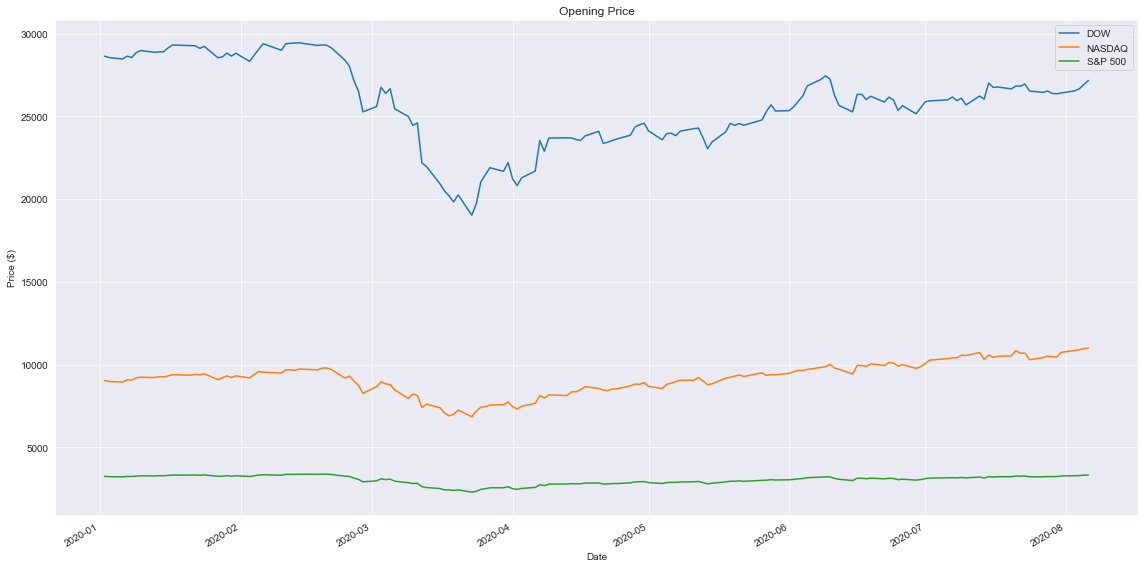

In [16]:
# Plotting the opening price for each index YTD
DJI['Open'].plot(label='DOW', figsize=(16,8), title='Opening Price')
NDX['Open'].plot(label='NASDAQ')
SPX['Open'].plot(label='S&P 500')
plt.ylabel('Price ($)')
plt.legend()
plt.tight_layout()
plt.show()

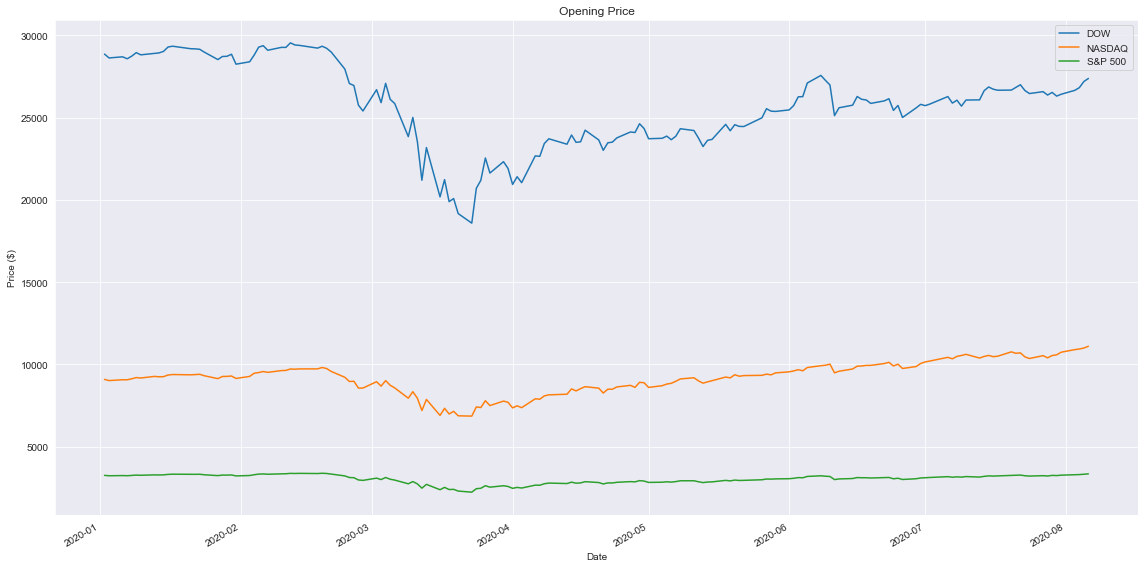

In [17]:
# Plotting the adjusted closing price for each index YTD
DJI['Adj Close'].plot(label='DOW', figsize=(16,8), title='Opening Price')
NDX['Adj Close'].plot(label='NASDAQ')
SPX['Adj Close'].plot(label='S&P 500')
plt.ylabel('Price ($)')
plt.legend()
plt.tight_layout()
plt.show()

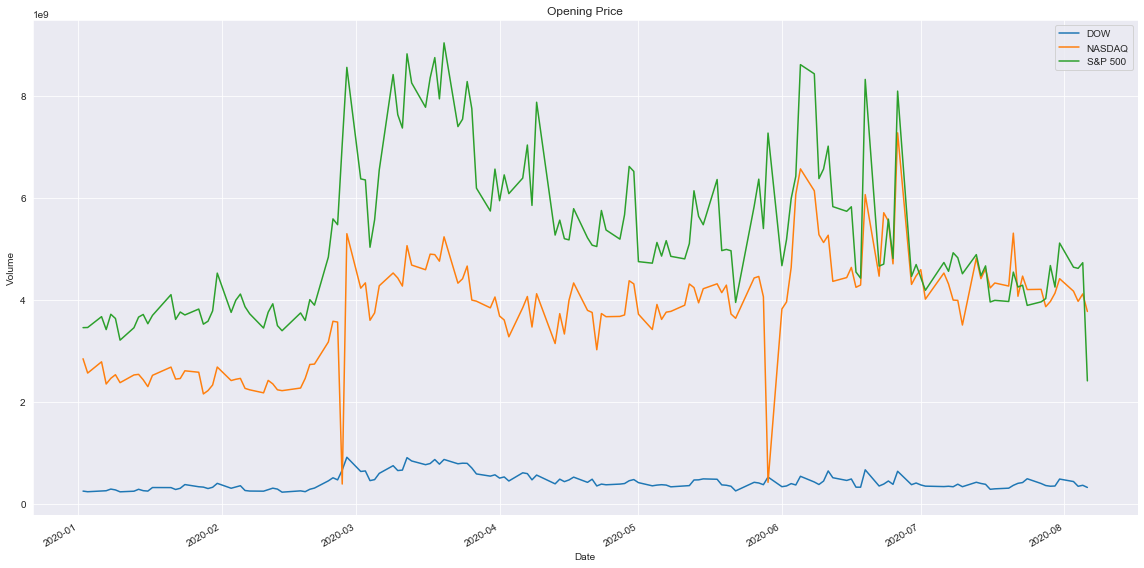

In [18]:
# Plotting trade volume per day for each index
DJI['Volume'].plot(label='DOW', figsize=(16,8), title='Opening Price')
NDX['Volume'].plot(label='NASDAQ')
SPX['Volume'].plot(label='S&P 500')
plt.ylabel('Volume')
plt.legend()
plt.tight_layout()
plt.show()

In [19]:
# Finding the day with DOW's highest volume of trading 
DJI['Volume'].idxmax()

Timestamp('2020-02-28 00:00:00')

In [20]:
# Finding the day with NASDAQ's highest volume of trading 
NDX['Volume'].idxmax()

Timestamp('2020-06-26 00:00:00')

In [21]:
# Finding the day with S&P 500's highest volume of trading 
SPX['Volume'].idxmax()

Timestamp('2020-03-20 00:00:00')

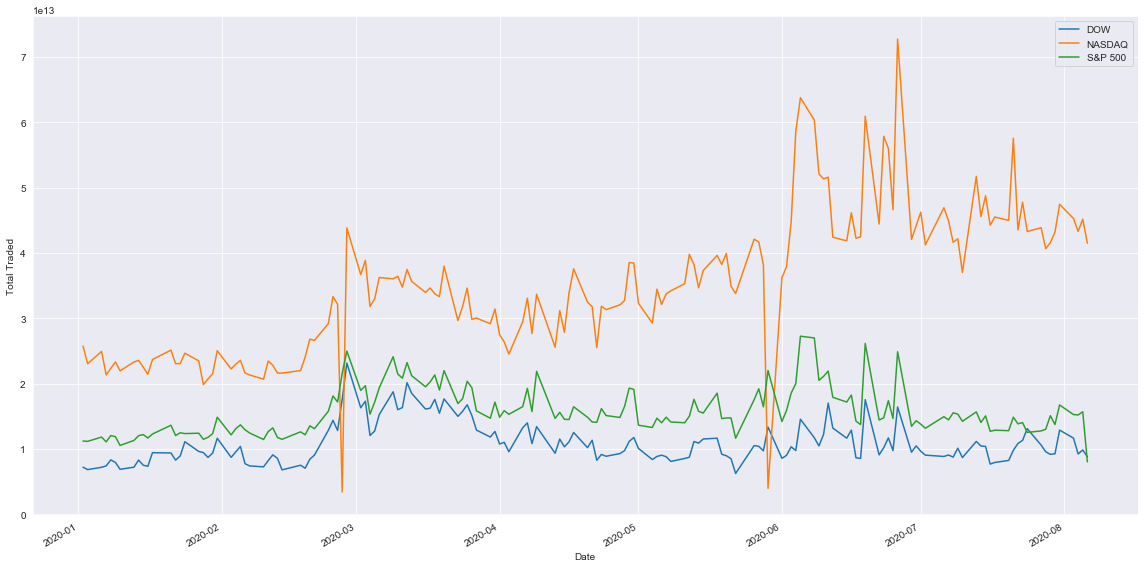

In [22]:
# To consider total market cap, not just the prices, we are doing a simple calculation to try to represent 
# total money traded by multiplying the Volume by the Open price.
# REMEMBER this isn't the actual Market Cap, it is a simple visual representation of the total amount of
# money being traded around using the time series.

DJI['Total Traded'] = DJI['Open'] * DJI['Volume']
NDX['Total Traded'] = NDX['Open'] * NDX['Volume']
SPX['Total Traded'] = SPX['Open'] * SPX['Volume']

DJI['Total Traded'].plot(label='DOW', figsize=(16,8))
NDX['Total Traded'].plot(label='NASDAQ')
SPX['Total Traded'].plot(label='S&P 500')
plt.ylabel('Total Traded')
plt.legend()
plt.tight_layout()
plt.show()

In [23]:
# Date when max amount of money was traded. What happened on that day?
DJI['Total Traded'].idxmax()

Timestamp('2020-02-28 00:00:00')

In [24]:
# Date when max amount of money was traded. What happened on that day?
NDX['Total Traded'].idxmax()

Timestamp('2020-06-26 00:00:00')

In [25]:
# Date when max amount of money was traded. What happened on that day?
SPX['Total Traded'].idxmax()

Timestamp('2020-06-05 00:00:00')

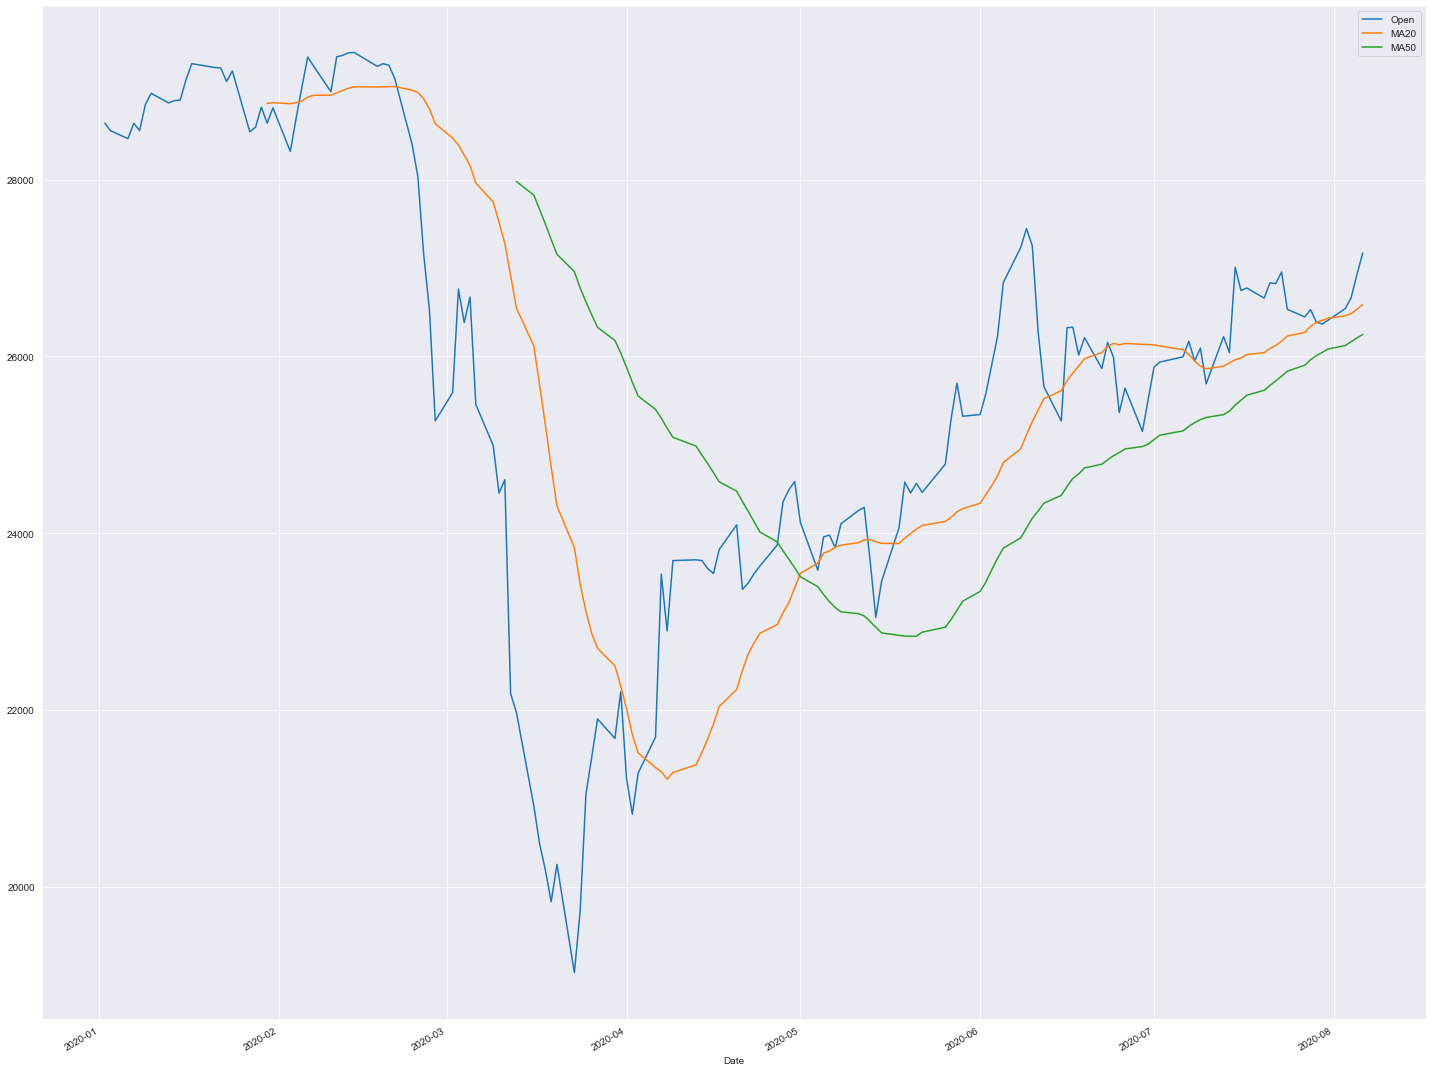

In [26]:
# Moving Averages (MA)
# Plotting MA20, MA50 and MA100 for DOW

DJI['MA20'] = DJI['Open'].rolling(20).mean()
DJI['MA50'] = DJI['Open'].rolling(50).mean()
# DJI['MA100'] = DJI['Open'].rolling(100).mean()
DJI[['Open', 'MA20','MA50']].plot(label='DOW', figsize=(20,15))

plt.tight_layout()
plt.show()

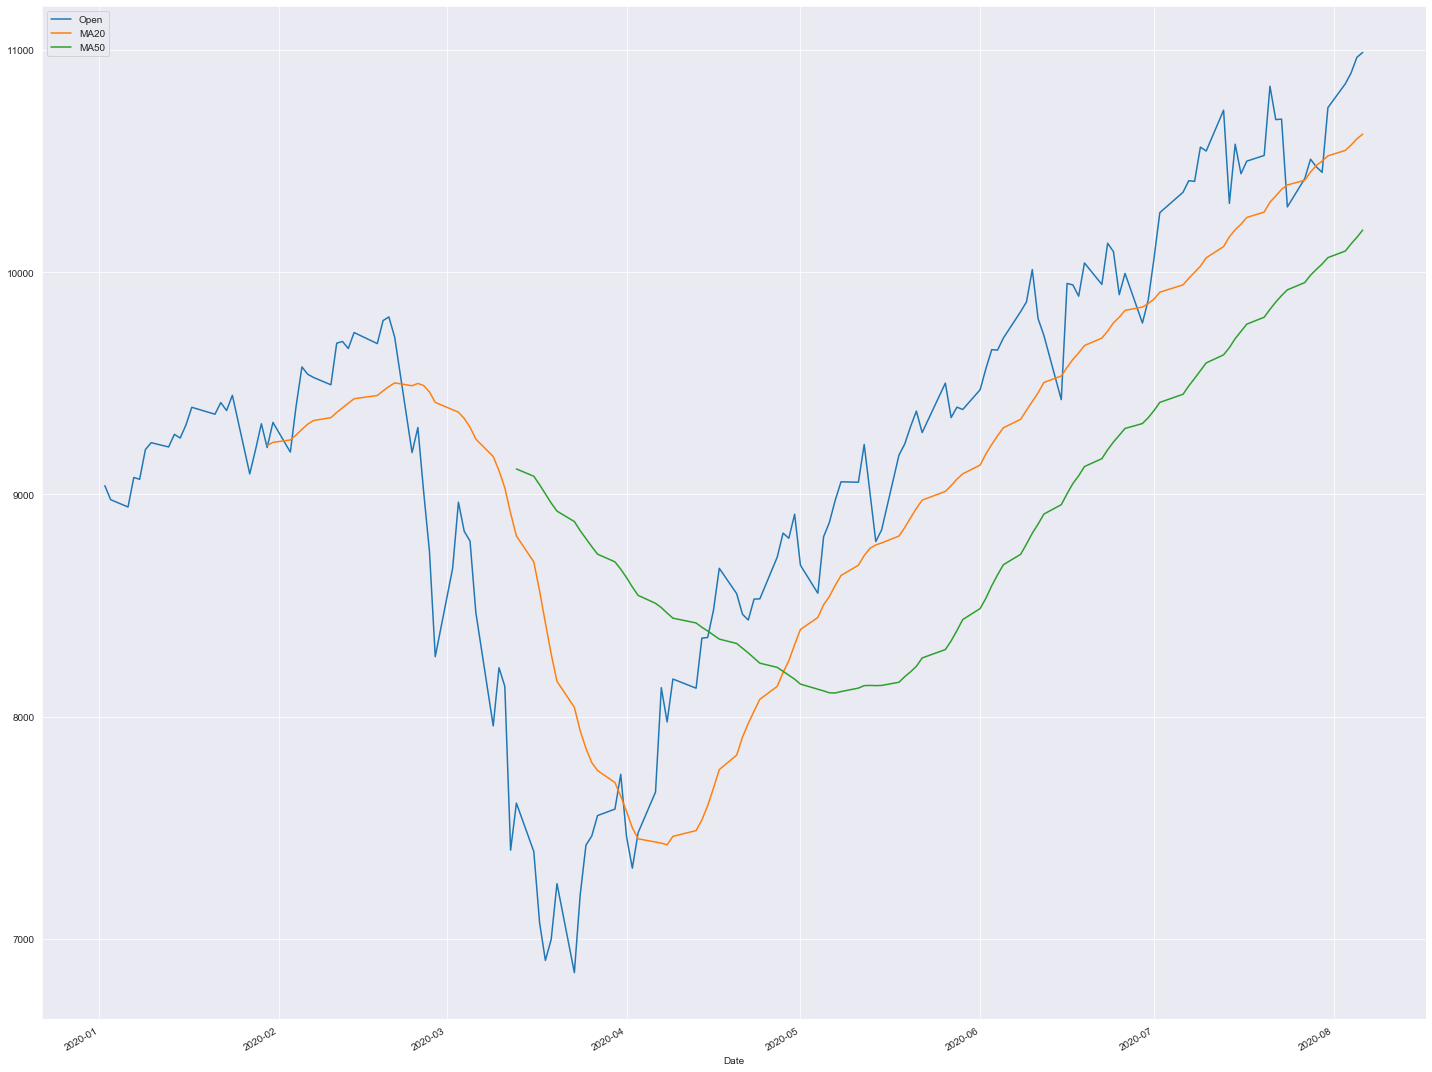

In [27]:
# Moving Averages (MA)
# Plotting MA20, MA50 and MA100 for NASDAQ

NDX['MA20'] = NDX['Open'].rolling(20).mean()
NDX['MA50'] = NDX['Open'].rolling(50).mean()
# NDX['MA100'] = NDX['Open'].rolling(100).mean()
NDX[['Open', 'MA20','MA50']].plot(label='NASDAQ', figsize=(20,15))

plt.tight_layout()
plt.show()

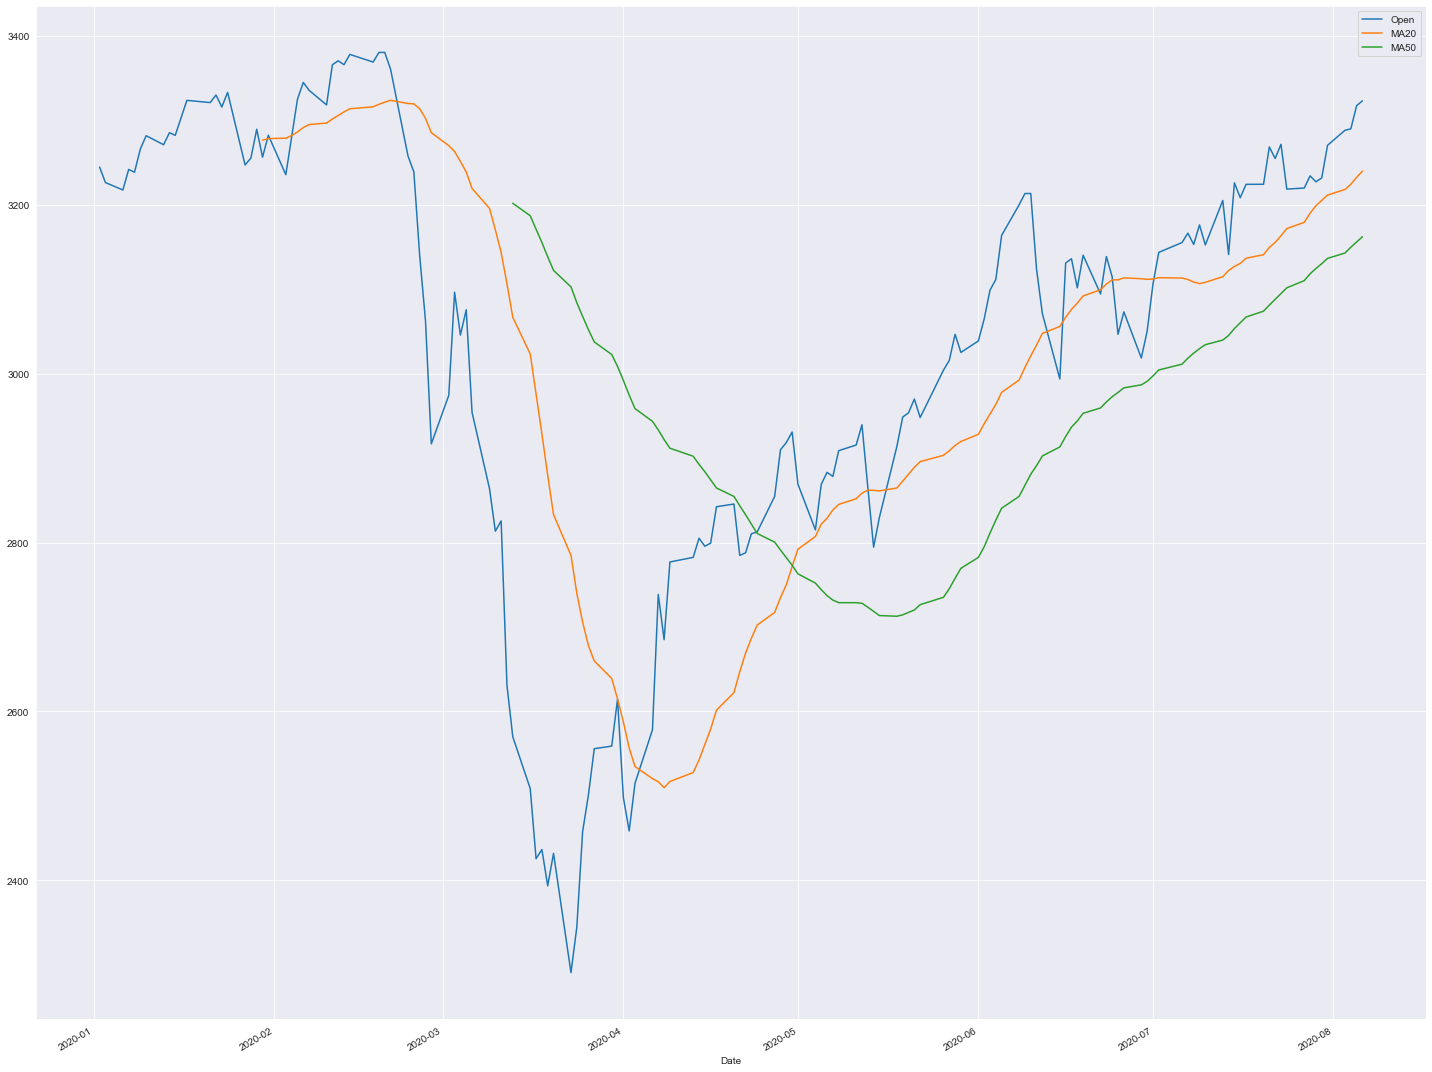

In [28]:
# Moving Averages (MA)
# Plotting MA20, MA50 and MA100 for S&P 500

SPX['MA20'] = SPX['Open'].rolling(20).mean()
SPX['MA50'] = SPX['Open'].rolling(50).mean()
# SPX['MA100'] = SPX['Open'].rolling(100).mean()
SPX[['Open', 'MA20','MA50']].plot(label='S&P 500', figsize=(20,15))

plt.tight_layout()
plt.show()

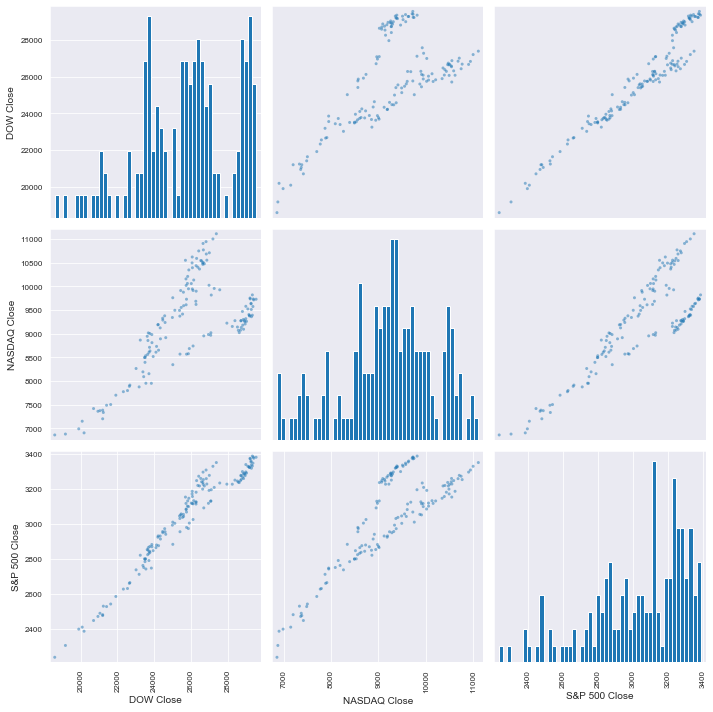

In [29]:
# Checking for a relationship between the 3 indices
index_comp = pd.concat([DJI['Close'], NDX['Close'], SPX['Close']], axis=1)
index_comp.columns=['DOW Close', 'NASDAQ Close', 'S&P 500 Close']

scatter_matrix(index_comp, figsize=(10,10), alpha=0.5, hist_kwds={'bins':50})
plt.tight_layout()
plt.show()

In [30]:
# Creating a new df to use for candlesticks
# Resetting index
DJI_reset = DJI.reset_index()

# Adding a new column which converts the date to a number value
DJI_reset['date_ax'] = DJI_reset['Date'].apply(lambda date: date2num(date))

# Pulling out values in a tuple form for the listed columns
list_cols = ['date_ax', 'Open', 'High', 'Low', 'Close']
DJI_values = [tuple(vals) for vals in DJI_reset[list_cols].values]

# Formatting
mondays = WeekdayLocator(MONDAY)
alldays = DateLocator()
weekFormatter = DateFormatter('%b %d')
dayFormatter = DateFormatter('%d')

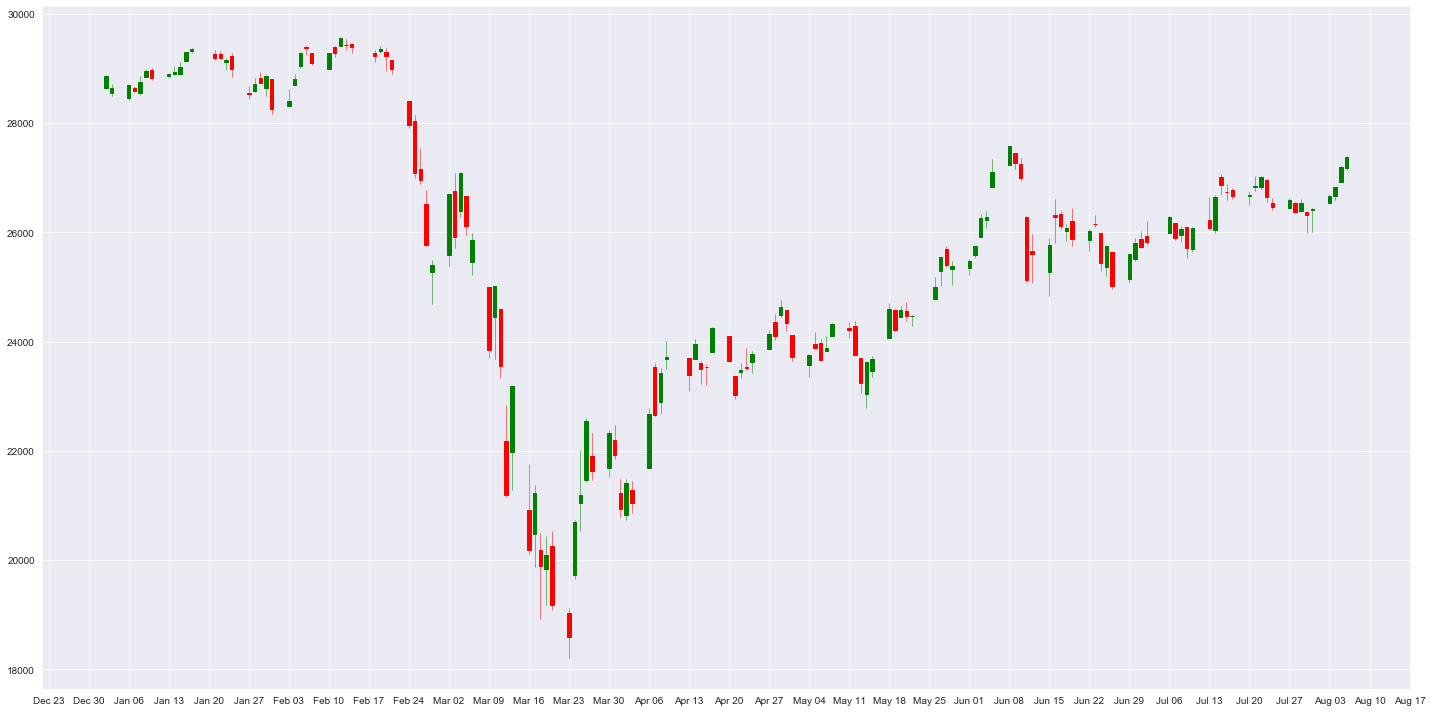

In [31]:
# Plotting candlestick chart of DOW
fig, ax = plt.subplots(figsize=(20,10))

# Setting x axis as the Monday for each week
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_major_formatter(weekFormatter)

# Candlestick
candlestick_ohlc(ax, DJI_values, width=0.6, colorup='g', colordown='r')
plt.tight_layout()
plt.show()

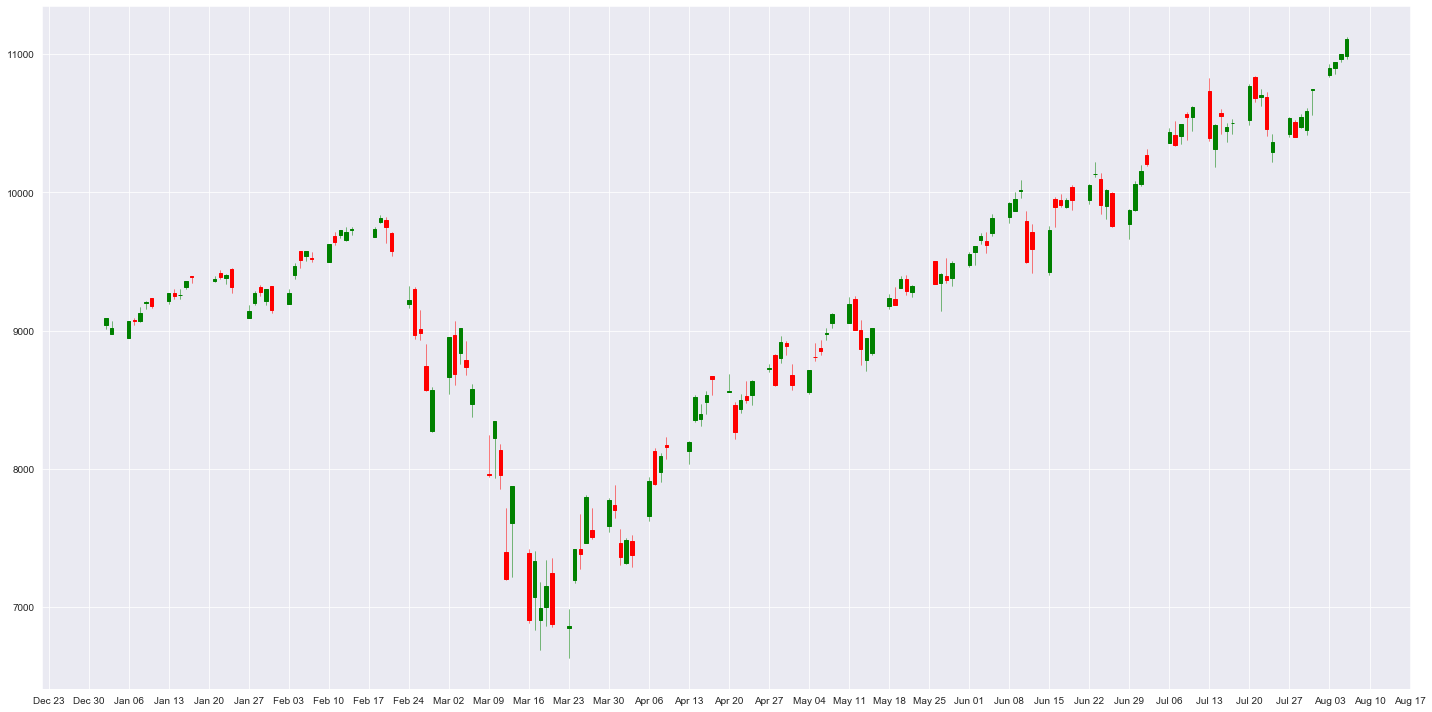

In [32]:
# Creating a new df to use for candlesticks
# Resetting index
NDX_reset = NDX.reset_index()

# Adding a new column which converts the date to a number value
NDX_reset['date_ax'] = NDX_reset['Date'].apply(lambda date: date2num(date))

# Pulling out values in a tuple form for the listed columns
list_cols = ['date_ax', 'Open', 'High', 'Low', 'Close']
NDX_values = [tuple(vals) for vals in NDX_reset[list_cols].values]

fig, ax = plt.subplots(figsize=(20,10))

# Setting x axis as the Monday for each week
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_major_formatter(weekFormatter)

# Candlestick
candlestick_ohlc(ax, NDX_values, width=0.6, colorup='g', colordown='r')
plt.tight_layout()
plt.show()

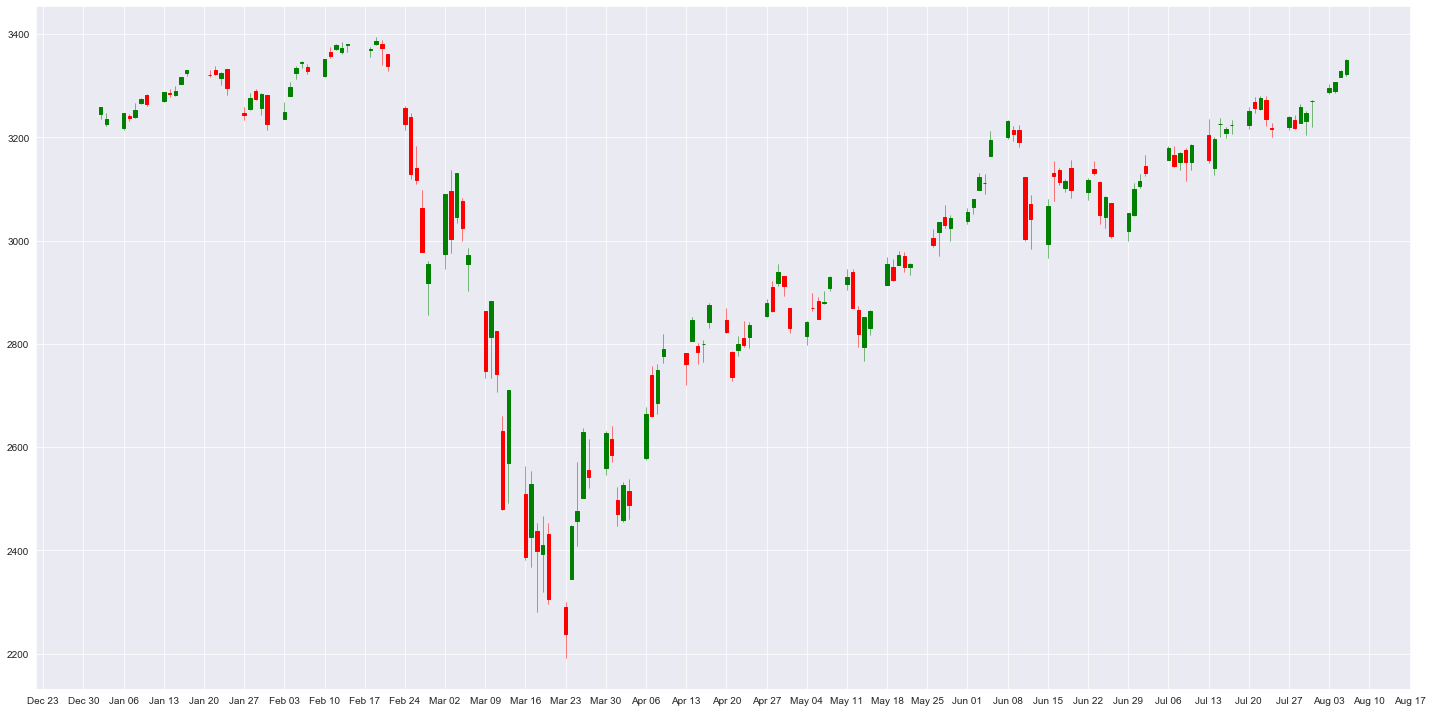

In [48]:
# Creating a new df to use for candlesticks
# Resetting index
SPX_reset = SPX.reset_index()

# Adding a new column which converts the date to a number value
SPX_reset['date_ax'] = SPX_reset['Date'].apply(lambda date: date2num(date))

# Pulling out values in a tuple form for the listed columns
list_cols = ['date_ax', 'Open', 'High', 'Low', 'Close']
SPX_values = [tuple(vals) for vals in SPX_reset[list_cols].values]

fig, ax = plt.subplots(figsize=(20,10))

# Setting x axis as the Monday for each week
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_major_formatter(weekFormatter)

# Candlestick
candlestick_ohlc(ax, SPX_values, width=0.6, colorup='g', colordown='r')
plt.tight_layout()
plt.show()

In [77]:
# Daily Percentage Change(rt)= (pt/(pt-1))-1
# Calculating the return from the Close price column
DJI['Returns'] = DJI['Close'].pct_change(1)
NDX['Returns'] = NDX['Close'].pct_change(1)
SPX['Returns'] = SPX['Close'].pct_change(1)
SPX.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,MA20,MA50,Returns
Date,,,,,,,,,,
2020-01-02,3258.139893,3235.530029,3244.669922,3257.850098,3458250000,3257.850098,1.122088e+13,NaN,NaN,NaN
2020-01-03,3246.149902,3222.340088,3226.360107,3234.850098,3461290000,3234.850098,1.116737e+13,NaN,NaN,-0.007060
2020-01-06,3246.840088,3214.639893,3217.550049,3246.280029,3674070000,3246.280029,1.182150e+13,NaN,NaN,0.003533
2020-01-07,3244.909912,3232.429932,3241.860107,3237.179932,3420380000,3237.179932,1.108839e+13,NaN,NaN,-0.002803
2020-01-08,3267.070068,3236.669922,3238.590088,3253.050049,3720890000,3253.050049,1.205044e+13,NaN,NaN,0.004902


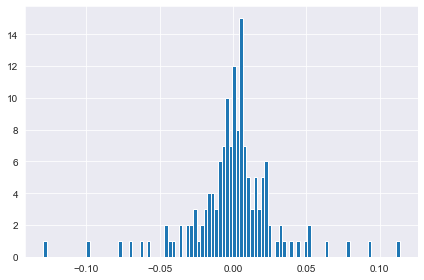

In [81]:
# Histogram of DOW Daily Percentage Change
DJI['Returns'].hist(bins=100)
plt.tight_layout()
plt.show()

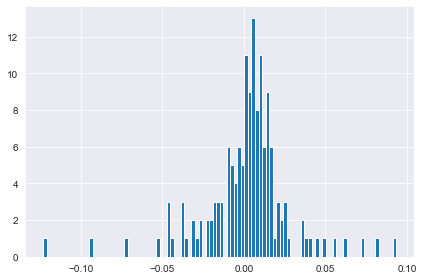

In [82]:
# Histogram of NASDAQ Daily Percentage Change
NDX['Returns'].hist(bins=100)
plt.tight_layout()
plt.show()

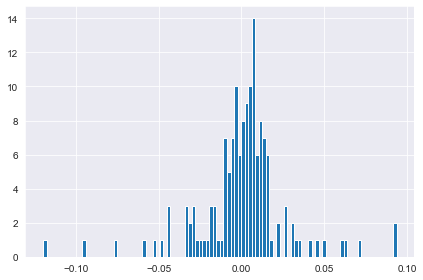

In [83]:
# Histogram of S&P 500 Daily Percentage Change
SPX['Returns'].hist(bins=100)
plt.tight_layout()
plt.show()

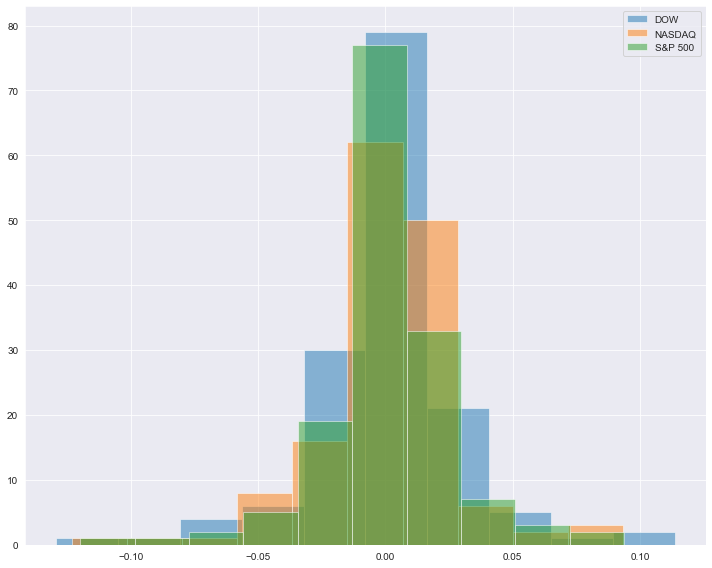

In [84]:
# Combined Daily Percentage Change histogram of all indices
DJI['Returns'].hist(bins=10, label='DOW', figsize=(10,8), alpha=0.5)
NDX['Returns'].hist(bins=10, label='NASDAQ', alpha=0.5)
SPX['Returns'].hist(bins=10, label='S&P 500', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

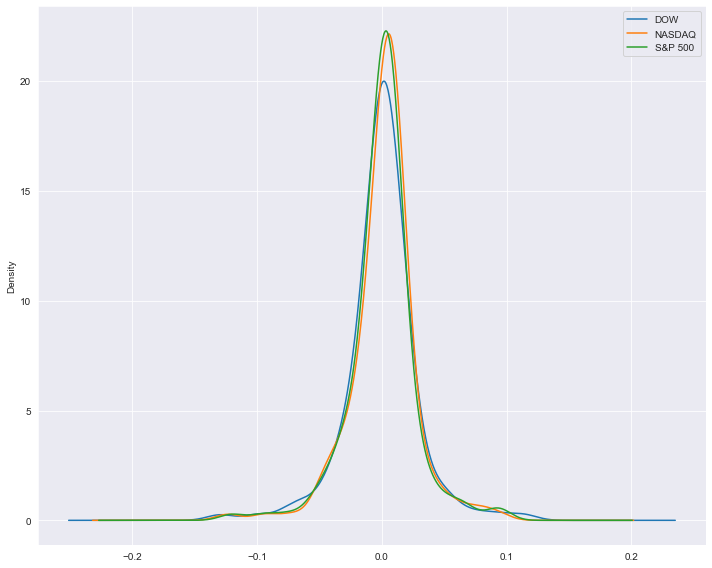

In [85]:
# Another visualization of the Daily Percentage Change for all indices
DJI['Returns'].plot(kind='kde', label='DOW', figsize=(10,8))
NDX['Returns'].plot(kind='kde', label='NASDAQ')
SPX['Returns'].plot(kind='kde', label='S&P 500')
plt.legend()
plt.tight_layout()
plt.show()

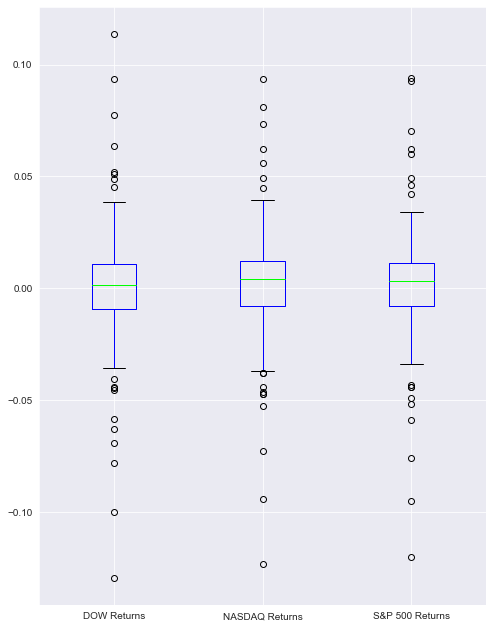

In [86]:
# Box plot of the Daily Percentage Change for all indices
box_df = pd.concat([DJI['Returns'],NDX['Returns'],SPX['Returns']], axis=1)
box_df.columns = ['DOW Returns', 'NASDAQ Returns', 'S&P 500 Returns']
box_df.plot(kind='box', figsize=(8,11), colormap='brg')
plt.show()

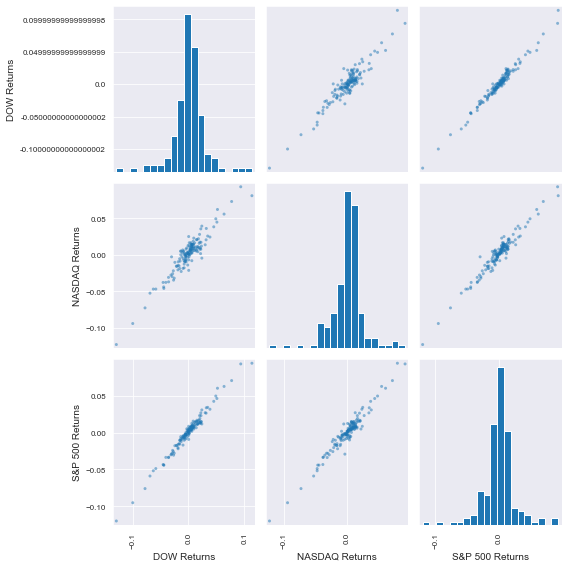

In [87]:
# Scatter plot to view relationship between 3 indices
scatter_matrix(box_df, figsize=(8,8), alpha=0.5, hist_kwds={'bins':20})
plt.tight_layout()
plt.show()

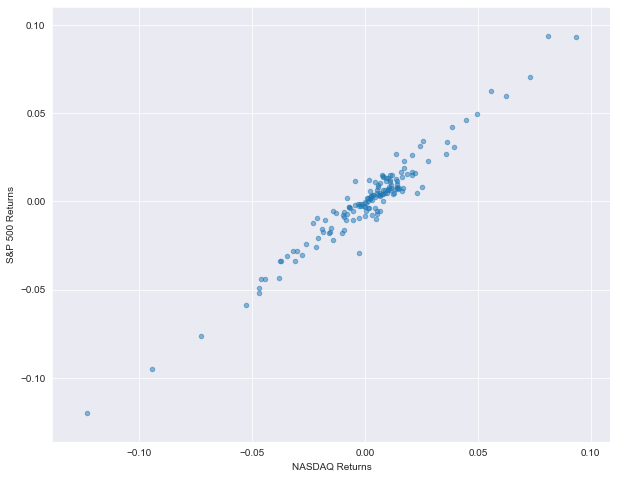

In [89]:
# box_df.plot(kind='scatter', x='NASDAQ Returns', y='S&P 500 Returns', alpha=0.5, figsize=(10,8))
# plt.show()

In [90]:
# Calculating Cumulative Daily Returns
# Cumulative Returns = (1+ pct_daily_returns).cumprod()

DJI['Cumulative Return'] = (1 + DJI['Returns']).cumprod()
NDX['Cumulative Return'] = (1 + NDX['Returns']).cumprod()
SPX['Cumulative Return'] = (1 + SPX['Returns']).cumprod()
DJI.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,MA20,MA50,Returns,Cumulative Return
Date,,,,,,,,,,,
2020-01-02,28872.800781,28627.769531,28638.970703,28868.800781,251820000,28868.800781,7.211866e+12,NaN,NaN,NaN,NaN
2020-01-03,28716.310547,28500.359375,28553.330078,28634.880859,239590000,28634.880859,6.841092e+12,NaN,NaN,-0.008103,0.991897
2020-01-06,28708.019531,28418.630859,28465.500000,28703.380859,252760000,28703.380859,7.194940e+12,NaN,NaN,0.002392,0.994270
2020-01-07,28685.500000,28565.279297,28639.179688,28583.679688,258900000,28583.679688,7.414684e+12,NaN,NaN,-0.004170,0.990124
2020-01-08,28866.179688,28522.509766,28556.140625,28745.089844,291750000,28745.089844,8.331254e+12,NaN,NaN,0.005647,0.995715


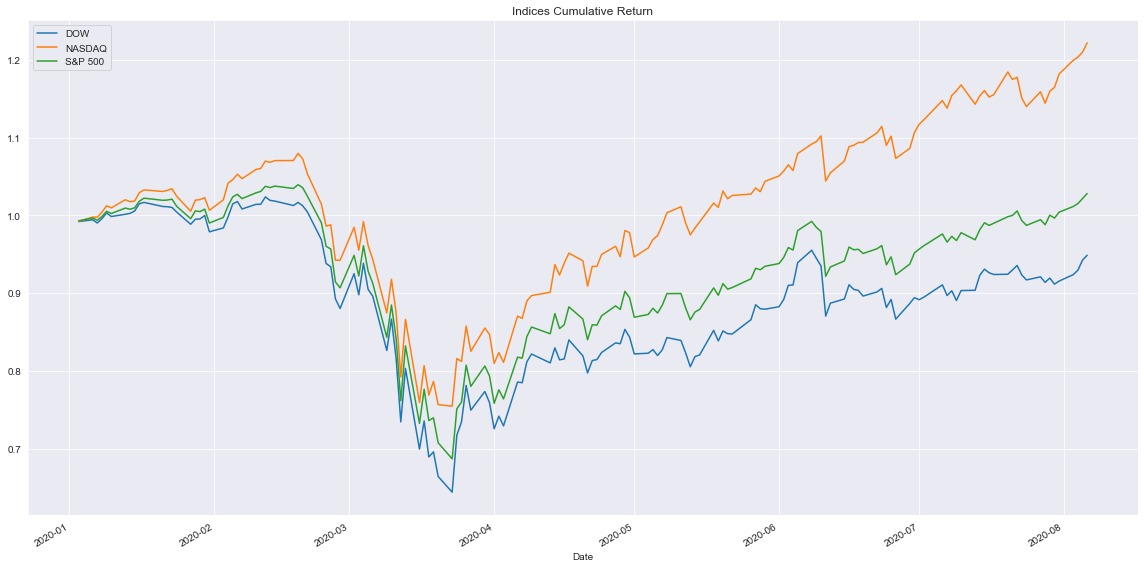

In [92]:
# Plotting Cumulative Return for all indices
DJI['Cumulative Return'].plot(label='DOW', figsize=(16,8), title='Indices Cumulative Return')
NDX['Cumulative Return'].plot(label='NASDAQ')
SPX['Cumulative Return'].plot(label='S&P 500')
plt.legend()
plt.tight_layout()
plt.show()